# Names and IDs
 1. Fadi Zoabi - 214026775
 2. Hussein Hasanin - 213971054

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct is $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

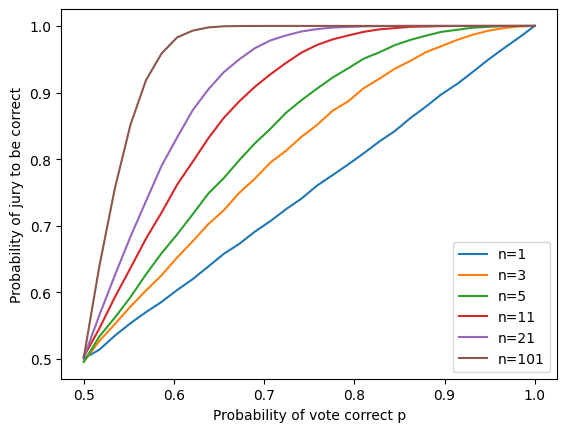

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_jury(p, n, num_simulations=100000):
    # Simulate num_simulations juries of size n
    # Each voter has a probability p of being correct
    votes = np.random.binomial(1, p, size=(num_simulations, n))
    # Determine if the majority is correct
    majority_correct = np.sum(votes, axis=1) > n / 2
    # Return the proportion of correct majorities
    return np.mean(majority_correct)

# Define the range of p and n values to plot
p_values = np.linspace(0.5, 1, 30)
n_values = [1, 3, 5, 11, 21, 101]

# Plot the results

for n in n_values:
    probabilities = [simulate_jury(p, n) for p in p_values]
    plt.plot(p_values, probabilities, label=f'n={n}')

plt.xlabel('Probability of vote correct p')
plt.ylabel('Probability of jury to be correct')
plt.legend()
plt.show()

Your proves goes here:

Let $X_i$ be the vote of juror $i$ (1 for correct, 0 for incorrect), with probability $p > 0.5$ of being correct.

By the Law of Large Numbers, as $n \rightarrow \infty$:

$\frac{1}{n}\sum_{i=1}^n X_i \rightarrow E[X_i] = p$

Since $p > 0.5$, this means that the proportion of correct votes converges to $p$.

The majority rule requires $\frac{1}{n}\sum_{i=1}^n X_i > 0.5$ for a correct decision.

Since $p > 0.5$, as $n \rightarrow \infty$, the probability that $\frac{1}{n}\sum_{i=1}^n X_i > 0.5$ approaches 1.

Therefore, $\Pr(\text{correct}) \rightarrow 1$ as $n \rightarrow \infty$.

The plot will show that larger jury sizes lead to more reliable decisions when individual jurors are more likely to be correct than random chance ($p > 0.5$).

# II. AdaBoost + Semi Supervised (35 points)
Obtaining labeled data is expensive in many real-world scenarios, but unlabeled data is abundant. Semi-supervised learning allows us to improve model performance by leveraging unlabeled data.

In this assignment, you will train an ensemble model (AdaBoost) on a small labeled dataset and then explore how to improve it using additional unlabeled data.

You will use one of the most common image datasets: CIFAR10. The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. [See more](https://en.wikipedia.org/wiki/CIFAR-10)



In [1]:
# Downloading the dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10

# Load CIFAR-10 dataset. 50K train, 10K test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Split the training set into 2K labeled and 48K unlabeled samples
x_labeled, x_unlabeled, y_labeled, _ = train_test_split(
    x_train, y_train, train_size=2000, stratify=y_train, random_state=42
)

**Answer the following questions:**

### EDA - Exploratory Data Analysis (10 pts):
Explore the cifar10 dataset, provide at least three plot-based conclusions about the dataset, and print sample images from each class.

***Write your code below***

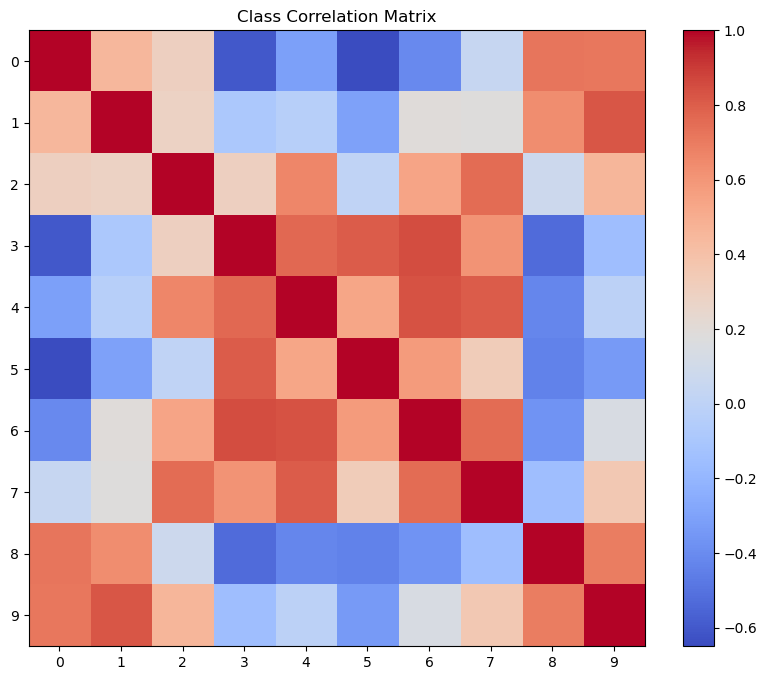

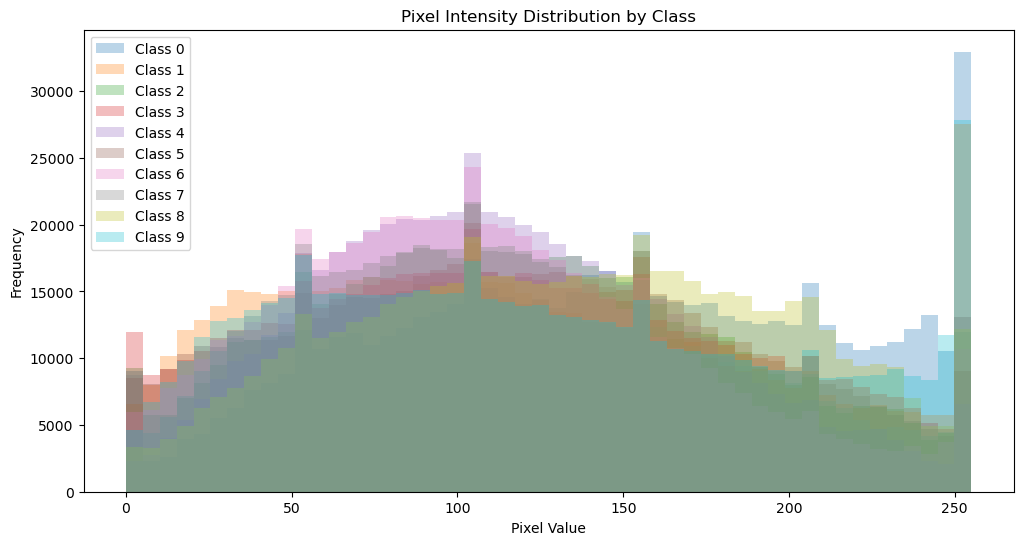

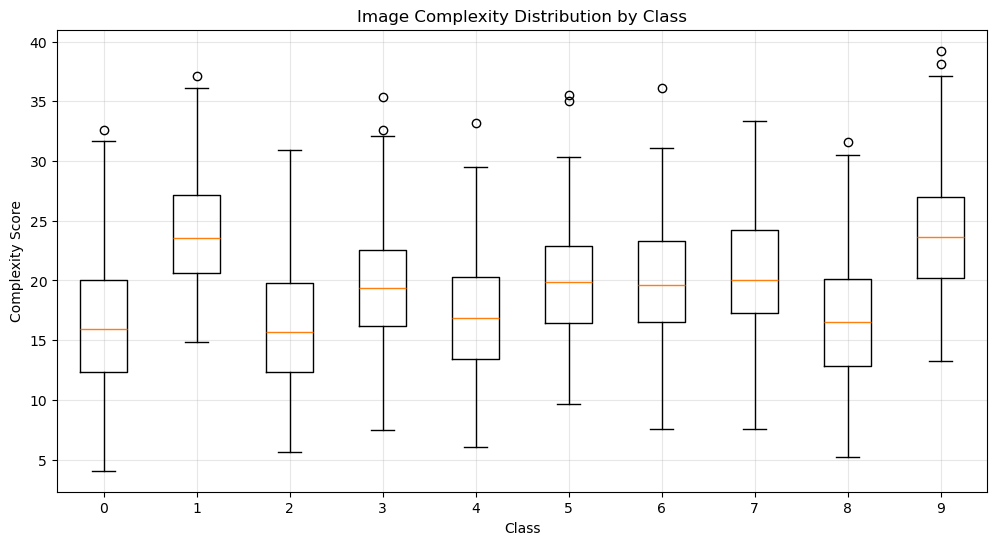

Class 0 average complexity: 16.392
Class 1 average complexity: 23.932
Class 2 average complexity: 16.268
Class 3 average complexity: 19.652
Class 4 average complexity: 17.075
Class 5 average complexity: 19.744
Class 6 average complexity: 19.933
Class 7 average complexity: 20.661
Class 8 average complexity: 16.635
Class 9 average complexity: 23.805


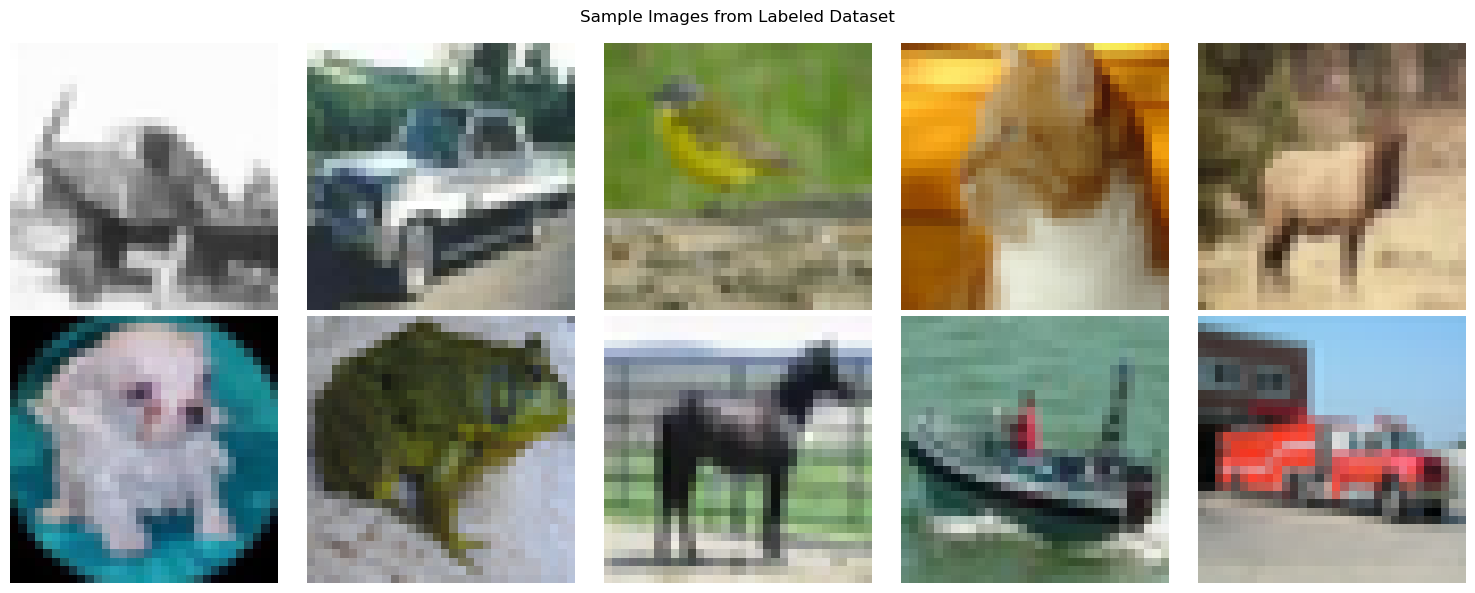

Total training images: 50000
Labeled images: 2000 (4.0%)
Unlabeled images: 48000 (96.0%)
Test images: 10000


In [2]:
# Implement here
import numpy as np

# Plot 1: Class Correlation Matrix
plt.figure(figsize=(10, 8))
class_features = np.array([np.mean(x_labeled[y_labeled == i], axis=0).flatten() for i in range(10)])
correlation_matrix = np.corrcoef(class_features)
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Class Correlation Matrix')
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

# Plot 2: Image Intensity Distribution
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.hist(x_labeled[y_labeled == i].ravel(), bins=50, alpha=0.3, label=f'Class {i}')
plt.title('Pixel Intensity Distribution by Class')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot 3: RGB Channel Distribution
# Plot Image Complexity Score by Class
plt.figure(figsize=(12, 6))
complexity_by_class = []

for class_idx in range(10):
    class_images = x_labeled[y_labeled == class_idx]
    class_complexity = []
    
    for img in class_images:
        dx = np.gradient(img)[0]
        dy = np.gradient(img)[1]
        complexity = np.mean(np.sqrt(dx**2 + dy**2))
        class_complexity.append(complexity)
    
    complexity_by_class.append(class_complexity)

plt.boxplot(complexity_by_class, labels=range(10))
plt.title('Image Complexity Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Complexity Score')
plt.grid(True, alpha=0.3)
plt.show()

# Print average complexity per class
for i, complexities in enumerate(complexity_by_class):
    print(f"Class {i} average complexity: {np.mean(complexities):.3f}")


# Plot 3: Image Complexity Score by Class
plt.figure(figsize=(15, 6))
for i in range(10):
    class_indices = np.where(y_labeled == i)[0]
    if len(class_indices) > 0:
        random_index = np.random.choice(class_indices)
        plt.subplot(2, 5, i+1)
        plt.imshow(x_labeled[random_index])
        plt.axis('off')
plt.suptitle('Sample Images from Labeled Dataset')
plt.tight_layout()
plt.show()

# Print dataset statistics
print(f"Total training images: {len(x_train)}")
print(f"Labeled images: {len(x_labeled)} ({len(x_labeled)/len(x_train)*100:.1f}%)")
print(f"Unlabeled images: {len(x_unlabeled)} ({len(x_unlabeled)/len(x_train)*100:.1f}%)")
print(f"Test images: {len(x_test)}")

### Model training and evaluating (10 pts):
Use the x_labeled and y_labeled to train an AdaBoost model, classify the images, and evaluate it using the testing set.

***Write your code below***

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.2, random_state=42)

# Reshape the data to 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# Create base estimator and AdaBoost classifier with optimized parameters
base_estimator = DecisionTreeClassifier(max_depth=5)
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME',
    random_state=42
)

# Create and fit the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    adaboost
)
pipeline.fit(X_train_flat, y_train)

# Make predictions
y_pred = pipeline.predict(X_test_flat)

# Calculate and display results
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


AdaBoost Accuracy: 0.3700

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.46      0.42        37
           1       0.43      0.25      0.32        36
           2       0.31      0.22      0.26        49
           3       0.40      0.18      0.25        45
           4       0.28      0.49      0.36        41
           5       0.31      0.39      0.35        38
           6       0.34      0.40      0.37        43
           7       0.45      0.34      0.39        41
           8       0.47      0.55      0.51        40
           9       0.44      0.50      0.47        30

    accuracy                           0.37       400
   macro avg       0.38      0.38      0.37       400
weighted avg       0.38      0.37      0.36       400



In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Apply PCA to reduce dimensions
pipeline = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(estimator=base_estimator,algorithm='SAMME', random_state=42)
)

# Define parameter grid
param_grid = {
    'adaboostclassifier__n_estimators': [50, 100, 200, 300, 500],
    'adaboostclassifier__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    'adaboostclassifier__estimator__max_depth': [2, 3, 4, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit the model
grid_search.fit(X_train_flat, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Best Parameters: {'adaboostclassifier__algorithm': 'SAMME.R', 'adaboostclassifier__estimator__max_depth': 5, 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 500}
Best Score: 0.328125


### Semi-Supervised usage (5 pts):
Explain how you would use the additional data (x_unlabeled) to improve your model performance.

The Additional data improve our code becuase we will have more data to train our model and I will use diversity generator to generate new data to train our model

### Semi-supervised training (10 pts):
Retrain the new model using x_labeled, x_unlabeled, and y_labeled, evaluate it using the testing set, and show the improvement.

***Write your code below***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import numpy as np

# Reshape the data to 2D
x_labeled_flat = x_labeled.reshape(x_labeled.shape[0], -1)
x_unlabeled_flat = x_unlabeled.reshape(x_unlabeled.shape[0], -1)

# Create base estimator and AdaBoost classifier with optimized parameters
base_estimator = DecisionTreeClassifier(max_depth=3)  # Reduced max_depth
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,  # Reduced number of estimators
    learning_rate=0.5,  # Increased learning rate
    algorithm='SAMME.R',  # Changed to SAMME.R for better performance
    random_state=42
)

# Create and fit the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    adaboost
)

# Initial fit
pipeline.fit(x_labeled_flat, y_labeled)

# Make predictions
y_pred = pipeline.predict(x_unlabeled_flat)
x_total = np.concatenate((x_labeled_flat, x_unlabeled_flat), axis=0)

# Add maximum iterations and convergence tracking
max_iterations = 10
iteration = 0
diff = 1
min_diff = 0.05

while diff > min_diff and iteration < max_iterations:
    y_pred_prev = y_pred.copy()
    y_total = np.concatenate((y_labeled, y_pred), axis=0)
    pipeline.fit(x_total, y_total)
    y_pred = pipeline.predict(x_unlabeled_flat)
    diff = np.mean(np.abs(y_pred - y_pred_prev))
    iteration += 1
    print(f"Iteration {iteration}, Difference: {diff:.4f}")

# Calculate and display results
y_total = np.concatenate((y_labeled, y_pred), axis=0)
accuracy = accuracy_score(y_test, y_total)
print(f"\nAdaBoost Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_total))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


---
# Section 2 - Features (50 Points)
---


### Machine Learning Assignment: Feature Generation, Feature Engineering, and Feature Selection

#### Objective:
The goal of this section is to give you hands-on experience with feature generation, feature engineering, and feature selection using a real-world dataset. You will preprocess the data, create new features, engineer existing features, and select the most relevant features for a machine learning model.

#### Dataset:
For this assignment, you will use the [UCI Machine Learning Repository's "Wine Quality Dataset"](https://archive.ics.uci.edu/ml/datasets/wine+quality). This dataset consists of various physicochemical tests of wine to predict the quality.

1. ## **Data Preprocessing:** (5 points)
   - Load the dataset and perform basic preprocessing steps including handling missing values, encoding categorical variables if any, and normalizing the data.

In [5]:
import pandas as pd

# Load the datasets
# Load the datasets with the correct delimiter
wine_quality_red = pd.read_csv("winequality-red.csv", delimiter=";")
wine_quality_white = pd.read_csv("winequality-white.csv", delimiter=";")


## EDA - Exploratory Data Analysis (5 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


/var/folders/6f/807d8ld153zchcvk1f7m0f200000gn/T/ipykernel_20755/1452869173.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_quality_red, palette='viridis')
/var/folders/6f/807d8ld153zchcvk1f7m0f200000gn/T/ipykernel_20755/1452869173.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_quality_white, palette='viridis')


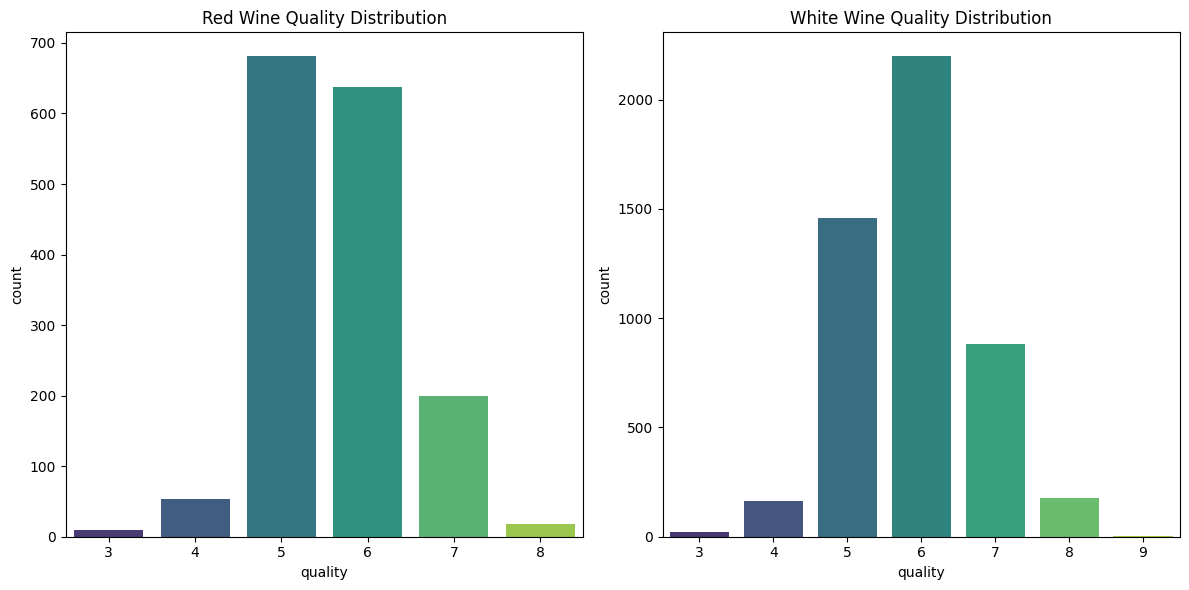

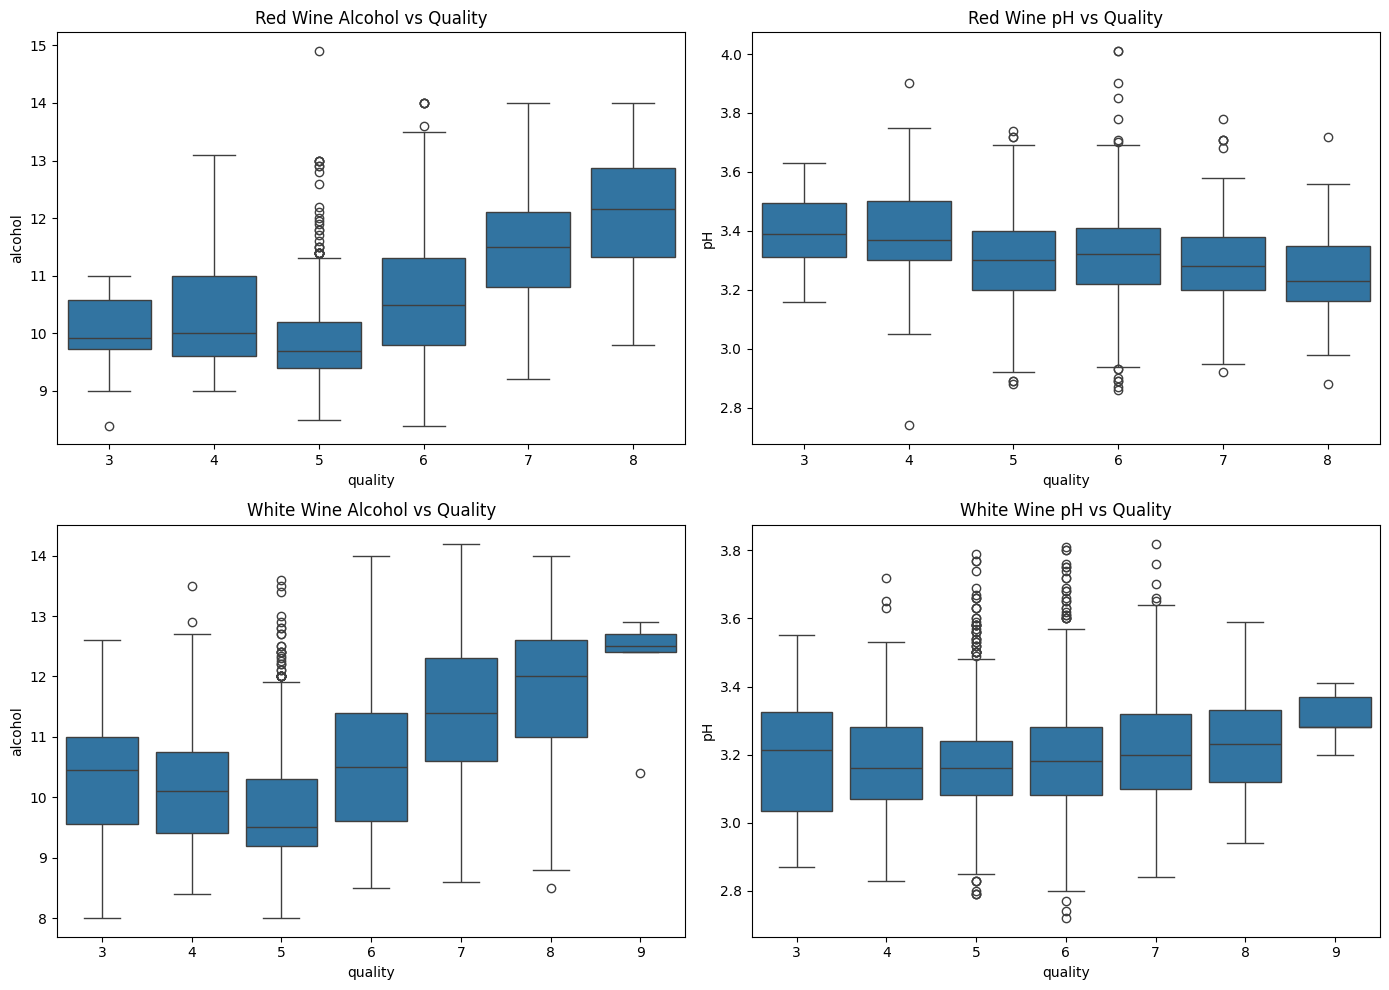

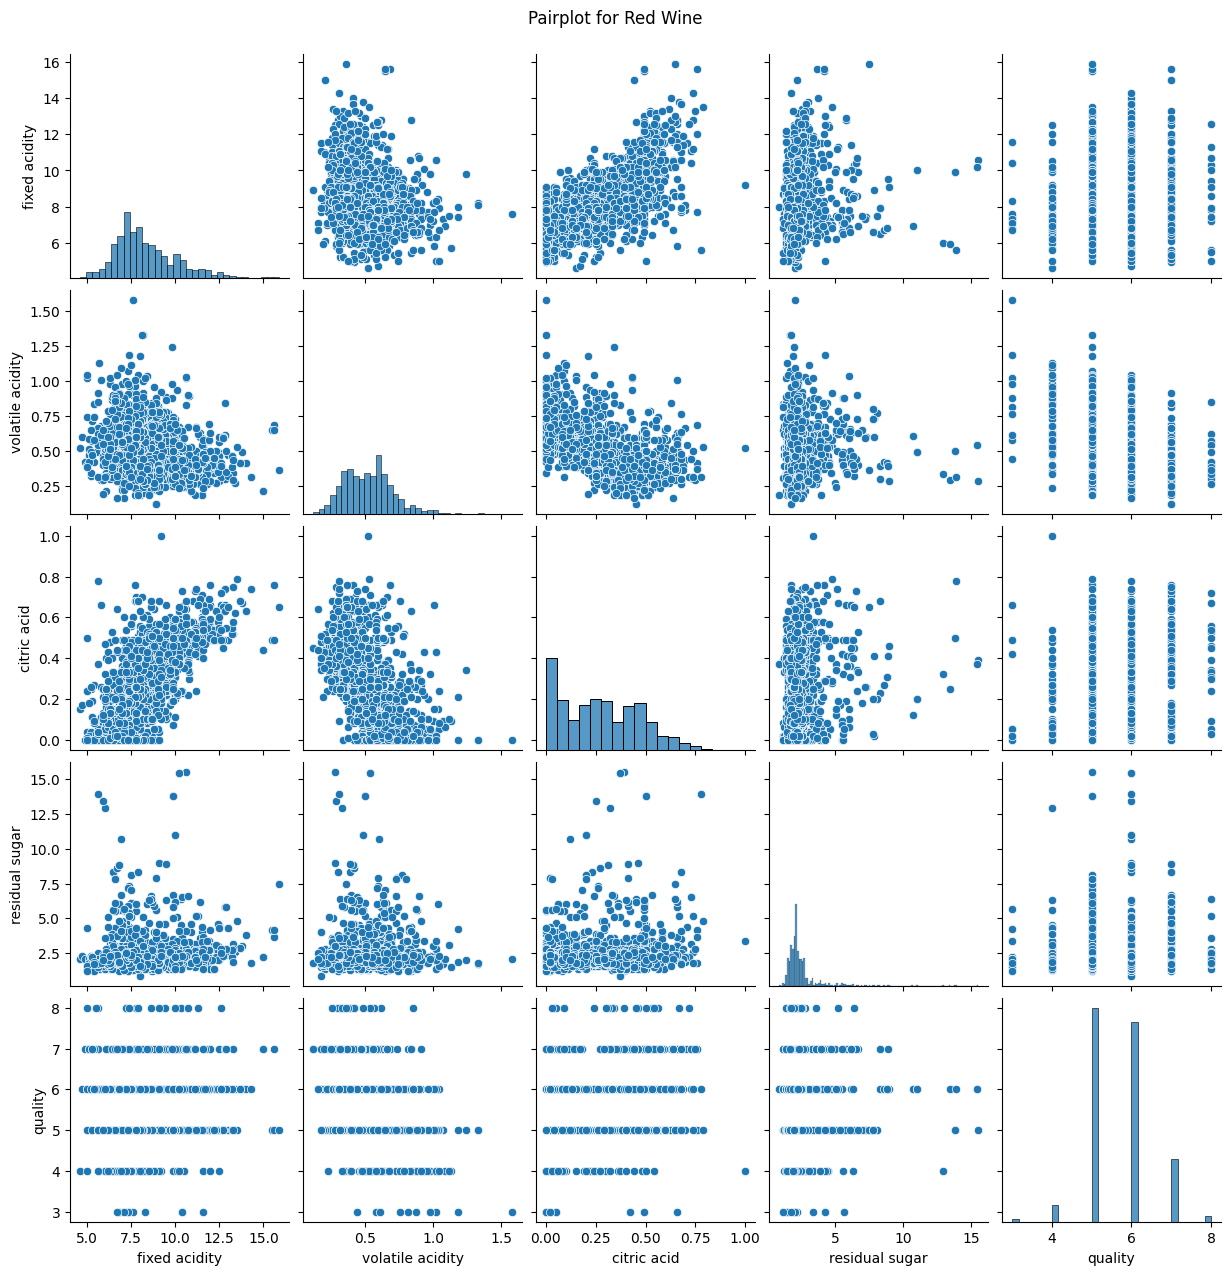

Red Wine Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [6]:
# Implement here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
red_stats = wine_quality_red.describe()
white_stats = wine_quality_white.describe()

# Correlation matrix for red and white wine
red_corr = wine_quality_red.corr()
white_corr = wine_quality_white.corr()

# Visualize the quality distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=wine_quality_red, palette='viridis')
plt.title('Red Wine Quality Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=wine_quality_white, palette='viridis')
plt.title('White Wine Quality Distribution')
plt.tight_layout()

# Boxplots of key attributes for red and white wines
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='quality', y='alcohol', data=wine_quality_red, ax=axes[0, 0])
axes[0, 0].set_title('Red Wine Alcohol vs Quality')

sns.boxplot(x='quality', y='pH', data=wine_quality_red, ax=axes[0, 1])
axes[0, 1].set_title('Red Wine pH vs Quality')

sns.boxplot(x='quality', y='alcohol', data=wine_quality_white, ax=axes[1, 0])
axes[1, 0].set_title('White Wine Alcohol vs Quality')

sns.boxplot(x='quality', y='pH', data=wine_quality_white, ax=axes[1, 1])
axes[1, 1].set_title('White Wine pH vs Quality')

plt.tight_layout()

# Pairplot for the first few columns of red wine
sns.pairplot(wine_quality_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']])
plt.suptitle("Pairplot for Red Wine", y=1.02)

# Display results
plt.show()

# Output summary statistics and correlations
print("Red Wine Statistics:")
print(red_stats)

print("\nWhite Wine Statistics:")
print(white_stats)

print("\nRed Wine Correlation Matrix:")
print(red_corr)
print("\nWhite Wine Correlation Matrix:")
print(white_corr)


In [8]:
# Explain here

# The red wine dataset contains 1599 samples with 11 physicochemical attributes and a quality score.
# The key statistics show that the average red wine quality score is 5.64, with a standard deviation of 0.81.
# Attributes like alcohol content (mean: 10.42) and pH (mean: 3.31) exhibit typical values within their respective ranges.
# The correlation analysis highlights that alcohol content has a moderate positive correlation with wine quality (0.44),
# while pH and sulphates show weaker correlations. Volatile acidity and residual sugar have a relatively low negative correlation
# with quality. These statistics and correlations suggest that alcohol is one of the more influential factors affecting red wine quality.



2. ## **Feature Generation:** (5 points)
   - Create at least three new features from the existing data. Explain your reasoning behind the creation of these features.
   - Example: You might create a new feature that is the ratio of alcohol to residual sugar.

In [12]:
# Implement here
import pandas as pd

# Assuming wine_quality_red is already loaded
# Create new features
wine_quality_red['alcohol_to_sugar_ratio'] = wine_quality_red['alcohol'] / wine_quality_red['residual sugar']
wine_quality_red['sulfur_ratio'] = wine_quality_red['total sulfur dioxide'] / wine_quality_red['free sulfur dioxide']
wine_quality_red['acidity_level'] = wine_quality_red['fixed acidity'] + wine_quality_red['volatile acidity']

# Display the first few rows of the updated dataset to see the new features
print(wine_quality_red[['alcohol_to_sugar_ratio', 'sulfur_ratio', 'acidity_level']].head())


   alcohol_to_sugar_ratio  sulfur_ratio  acidity_level
0                4.947368      3.090909           8.10
1                3.769231      2.680000           8.68
2                4.260870      3.600000           8.56
3                5.157895      3.529412          11.48
4                4.947368      3.090909           8.10


In [10]:
# Explain here

# Explanation of the new features:
# 1. Alcohol to Residual Sugar Ratio: Helps to understand the balance between alcohol content and sweetness.
#    A higher ratio might suggest a drier wine.
# 2. Sulfur Ratio: Shows how the total sulfur dioxide is distributed between free and bound forms, 
#    which can indicate wine preservation characteristics.
# 3. Acidity Level: Combines fixed and volatile acidity into a single feature to represent overall acidity, 
#    a crucial component of a wine’s flavor profile.
# These new features could potentially improve a predictive model for wine quality, 
# as they combine existing variables into new informative metrics.


3. ## **Feature Engineering:** (10 points)
   - Engineer at least three features from the existing data by transforming the original features.
   - Example: You could create polynomial features, interaction features, or apply log transformations.

In [11]:

# Implement here
import numpy as np

def create_engineered_features(wine_quality_data):

    # Apply log transformation to residual sugar
    wine_quality_data['log_residual_sugar'] = np.log(wine_quality_data['residual sugar'])

    # Create an interaction feature between alcohol and acidity level
    wine_quality_data['alcohol_acidity_interaction'] = wine_quality_data['alcohol'] * wine_quality_data['acidity_level']

    # Create a polynomial feature of citric acid (squared)
    wine_quality_data['citric_acid_squared'] = wine_quality_data['citric acid'] ** 2

    return wine_quality_data

# Example usage (assuming `wine_quality_red` is loaded):
wine_quality_red = create_engineered_features(wine_quality_red)

# Display the new features
print(wine_quality_red[['log_residual_sugar', 'alcohol_acidity_interaction', 'citric_acid_squared']].head())

   log_residual_sugar  alcohol_acidity_interaction  citric_acid_squared
0            0.641854                       76.140               0.0000
1            0.955511                       85.064               0.0000
2            0.832909                       83.888               0.0016
3            0.641854                      112.504               0.3136
4            0.641854                       76.140               0.0000


In [12]:
# Explain here

# The function 'create_engineered_features' performs feature engineering on the given DataFrame 'wine_quality_data'.
# 1. Log Transformation: 
#    - Applies a natural logarithm to the 'residual sugar' column to reduce skewness in the data.
# 2. Interaction Feature: 
#    - Multiplies the 'alcohol' and 'acidity_level' columns to create a new feature capturing their combined effect.
# 3. Polynomial Feature: 
#    - Squares the 'citric acid' column to introduce a non-linear relationship, helping capture complex patterns.
# The function returns the DataFrame with these new features added, making the dataset more informative for machine learning models.


4. ## **Feature Selection:** (10 points)
   - Apply at least two different feature selection methods to identify the most important features.
   - Example methods: Recursive Feature Elimination (RFE), Lasso Regression, or mutual information, NMF.
   - Compare the selected features from each method and discuss the differences.

In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Assuming wine_quality_red is the dataset you're working with
# Prepare data (X - features, y - target)
X = wine_quality_red.drop(columns=['quality'])
y = wine_quality_red['quality']

# Split into train/test for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Recursive Feature Elimination (RFE) with Linear Regression
model_rfe = LinearRegression()
rfe = RFE(estimator=model_rfe, n_features_to_select=3)  # Select top 3 features
rfe.fit(X_train, y_train)

# Get the selected features from RFE
selected_features_rfe = X.columns[rfe.support_]
print("Selected features from RFE:", selected_features_rfe)

# 2. Lasso Regression for feature selection
lasso = Lasso(alpha=0.1)  # Regularization strength (can be tuned)
lasso.fit(X_train, y_train)

# Get the features with non-zero coefficients
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected features from Lasso Regression:", selected_features_lasso)

# Optionally, you could print the coefficients to understand the impact of each feature
print("\n\nLasso coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")


Selected features from RFE: Index(['fixed acidity', 'volatile acidity', 'acidity_level'], dtype='object')
Selected features from Lasso Regression: Index(['free sulfur dioxide', 'total sulfur dioxide', 'alcohol',
       'alcohol_acidity_interaction'],
      dtype='object')


Lasso coefficients:
fixed acidity: -0.0
volatile acidity: -0.0
citric acid: 0.0
residual sugar: -0.0
chlorides: -0.0
free sulfur dioxide: 0.0076716144690814935
total sulfur dioxide: -0.00409685757147175
density: -0.0
pH: -0.0
sulphates: 0.0
alcohol: 0.19743164767824595
alcohol_to_sugar_ratio: 0.0
sulfur_ratio: -0.0
acidity_level: -0.0
log_residual_sugar: -0.0
alcohol_acidity_interaction: 0.00715953120270675
citric_acid_squared: 0.0


In [14]:
# Explain here

# RFE selects features based on their importance in a linear regression model
# Focuses on simple, key features directly related to wine quality

# RFE selected features:
# - 'fixed acidity'
# - 'volatile acidity'
# - 'acidity_level'

# Lasso applies L1 regularization to select features with non-zero coefficients
# Captures more complex relationships, including interactions and preservation factors

# Lasso selected features:
# - 'free sulfur dioxide'
# - 'total sulfur dioxide'
# - 'alcohol'
# - 'alcohol_acidity_interaction'

# Key differences:
# - RFE: Focuses on core chemical properties (acidity-related features)
# - Lasso: Includes alcohol, preservation features, and interaction effects


5. ## **Model Building and Evaluation:** (10 points)
   - Using the selected features from the best feature selection method, build and evaluate a machine learning model (e.g., a linear regression model or a decision tree).
   - Split the data into training and test sets, and use appropriate metrics to evaluate the model's performance.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data (using previously selected features)
X_selected = X[selected_features]
y = wine_quality_red['quality']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Absolute Error (MAE): 0.5108753997371085
R-squared: 0.3364844031884132


In [16]:
# Explain here
TODO : Explain the results after update the model


# Random Forest Regressor Model Performance

# Mean Absolute Error (MAE):
# MAE of 0.51 means that, on average, the model's predictions deviate from the actual values by 0.51 units.
# Lower MAE is better; smaller values indicate more accurate predictions.

# R-squared:
# R-squared value of 0.34 means the model explains 34% of the variance in the target variable (wine quality).
# Higher R-squared values (closer to 1) indicate better predictive power, while lower values suggest the model 
# does not capture much of the data's variance.

# Interpretation:
# - The model is able to make predictions, but the performance is not excellent.
# - There is room for improvement, especially by refining features, performing hyperparameter tuning, or using 
#   more advanced models.


6. ## **Report:** (10 points)
   - Write a detailed report explaining each step of your process, including code snippets and results. Discuss the impact of your feature engineering and selection on the model's performance.
   - Provide visualizations where applicable to support your findings.

# Reports goes here

#### Notes:
- Submit a Jupyter Notebook containing your code and full explanations.
- Include the dataset and any additional files needed to run your notebook inside the notebook.
- Ensure your notebook is well-documented with comments and markdown cells explaining your thought process.
- You are encouraged to explore different libraries and methods beyond what was covered in class.
- If you use any external resources or libraries, make sure to cite them appropriately in your notebook.
- Name of file should be changed to EX3_ID1_ID2

Good luck, and have fun exploring the power of feature engineering and selection!